In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
stores = pd.read_csv("stores.csv")
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
features = pd.read_csv("features.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
def mergeData(train, stores, features):
    result = pd.merge(train, stores, on='Store')
    result = pd.merge(result, features, on=['Store', 'Date'])
    return result

mergeData merges different data sets about Walmart with different keys. With the help of keys we are sure about the rebostness of merge process.

In [6]:
data = mergeData(train,stores,features)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [7]:
data.drop('IsHoliday_y',axis=1, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


# Store Feature

Text(0, 0.5, 'Weekly Sales')

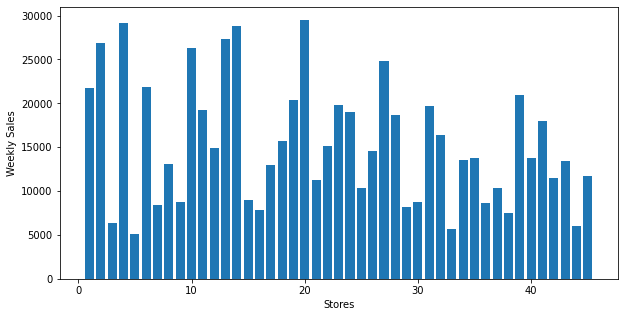

In [8]:
store_analysis = data.groupby(['Store'],as_index=False).mean()
plt.figure(figsize=(10,5))
plt.bar(store_analysis['Store'],store_analysis['Weekly_Sales'])
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')

Since there is large amount of differences between different stores in terms of weekly sales, categorizing stores in four group would be good for decreasing the amount of feature since store is a categorical feature.

## Categorizing Stores

In [9]:
def categorize(w_s):
    if w_s < 10000:
        return 1
    elif w_s>10000 and w_s <15000:
        return 2
    elif w_s>15000 and w_s <20000:
        return 3
    else:
        return 4
data['Store_Cat'] = data.apply(lambda row: categorize(row['Weekly_Sales']), axis=1)
data.drop('Store',axis=1, inplace=True)

In [10]:
data.head()

,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Store_Cat
0,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4
1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4
2,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2
3,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4
4,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4


# Type Feature

Text(0, 0.5, 'Weekly Sales')

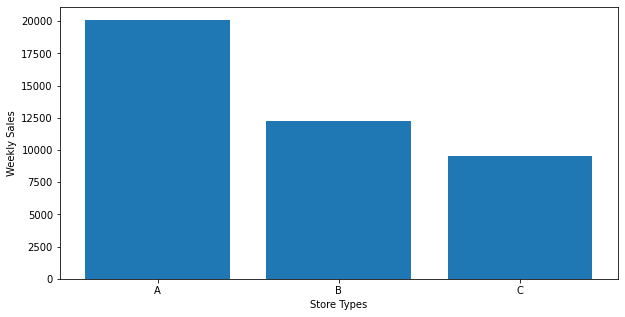

In [11]:
type_analysis = data.groupby(['Type'],as_index=False).mean()
plt.figure(figsize=(10,5))
plt.bar(type_analysis['Type'],type_analysis['Weekly_Sales'])
plt.xlabel('Store Types')
plt.ylabel('Weekly Sales')

Since Type is categorical data and we don't have too much categories we don't need to do any extra opreation on it

# Dept Feature

Text(0, 0.5, 'Weekly_Sales')

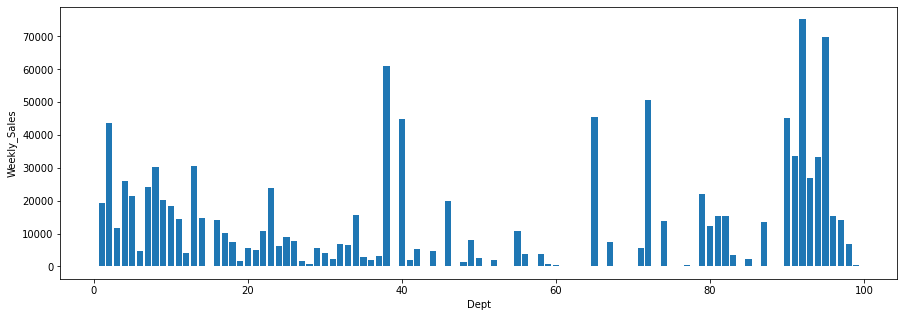

In [12]:
dept_analysis = data.groupby(['Dept'],as_index=False).mean()
plt.figure(figsize=(15,5))
plt.bar(dept_analysis['Dept'],dept_analysis['Weekly_Sales'])
plt.xlabel('Dept')
plt.ylabel('Weekly_Sales')

Since there is large amount of differences between different departments in terms of weekly sales, categorizing them in four group would be good for decreasing the amount of feature since department is a categorical feature.

### Categorizing Depts

In [13]:
def categorize(w_s):
    if w_s < 10000:
        return 1
    elif w_s>10000 and w_s <30000:
        return 2
    elif w_s>30000 and w_s <50000:
        return 3
    else:
        return 4
data['Dept_Cat'] = data.apply(lambda row: categorize(row['Weekly_Sales']), axis=1)
data.drop('Dept',axis=1, inplace=True)

In [14]:
data.head()

,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Store_Cat,Dept_Cat
0,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,2
1,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,4
2,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,2
3,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,3
4,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,3


# Date Feature

In [15]:
def splitDate(date):
    return date.split("-")
data['Year'] = data.apply(lambda row: int(splitDate(row['Date'])[0]), axis=1)
data['Month'] = data.apply(lambda row: int(splitDate(row['Date'])[1]), axis=1)
data['Day'] = data.apply(lambda row: int(splitDate(row['Date'])[2]), axis=1)
data.drop('Date', inplace=True, axis=1)
data.head()    

,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Store_Cat,Dept_Cat,Year,Month,Day
0,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,2,2010,2,5
1,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,4,2010,2,5
2,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,2,2010,2,5
3,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,3,2010,2,5
4,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,3,2010,2,5


We should split date in 3 different columns to get meaningful features, otherwise accepting the date string an categorical feature not make sense.

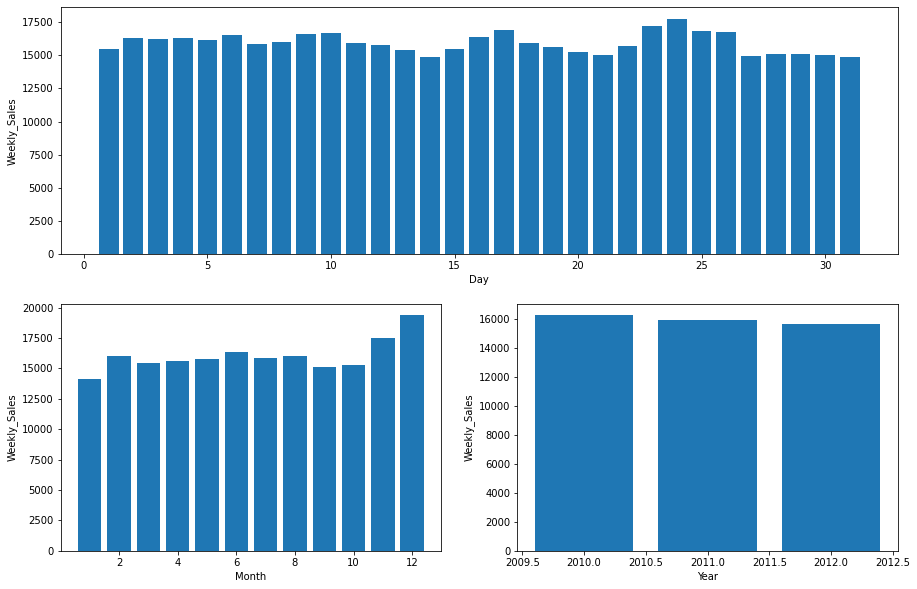

In [16]:
plt.figure(figsize=(15,10))

day_analysis = data.groupby(['Day'],as_index=False).mean()
plt.subplot(2, 1, 1)
plt.bar(day_analysis['Day'],day_analysis['Weekly_Sales'])
plt.xlabel('Day')
plt.ylabel('Weekly_Sales')

month_analysis = data.groupby(['Month'],as_index=False).mean()
plt.subplot(2, 2, 3)
plt.bar(month_analysis['Month'],month_analysis['Weekly_Sales'])
plt.xlabel('Month')
plt.ylabel('Weekly_Sales')

year_analysis = data.groupby(['Year'],as_index=False).mean()
plt.subplot(2, 2, 4)
plt.bar(year_analysis['Year'],year_analysis['Weekly_Sales'])
plt.xlabel('Year')
plt.ylabel('Weekly_Sales')

plt.show()

In [17]:
def isSpecialDay(Year,Month,Day):
    specialDays=[(2010,2,12),(2011,2,11),(2012,2,10),(2013,2,8),
                (2010,9,19),(2011,9,9),(2012,9,7),(2013,9,6),
                (2010,11,26),(2011,11,25),(2012,11,23),(2013,11,29),
                (2010,12,31),(2011,12,30),(2012,12,28),(2013,12,27)] 
    if (Year,Month,Day) in specialDays:
        return 1
    else:
        return 0
data['Special_Day'] = data.apply(lambda row: isSpecialDay(row['Year'],row['Month'],row['Day']), axis=1)

In [18]:
def categorizeMonth(m):
    if m == 11 or m == 12:
        return 1
    else:
        return 0
data['Lucky_Months'] = data.apply(lambda row: categorizeMonth(row['Month']), axis=1)
data.head()

,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Store_Cat,Dept_Cat,Year,Month,Day,Special_Day,Lucky_Months
0,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,2,2010,2,5,0,0
1,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,4,2010,2,5,0,0
2,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,2,2010,2,5,0,0
3,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,3,2010,2,5,0,0
4,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,3,2010,2,5,0,0


We don't have any considerable difference in Days and Years but in 11th and 12th month weekly sales are considerably higher than the other months. So defining them as "LuckyMonths" would make sense.

# Size Feature

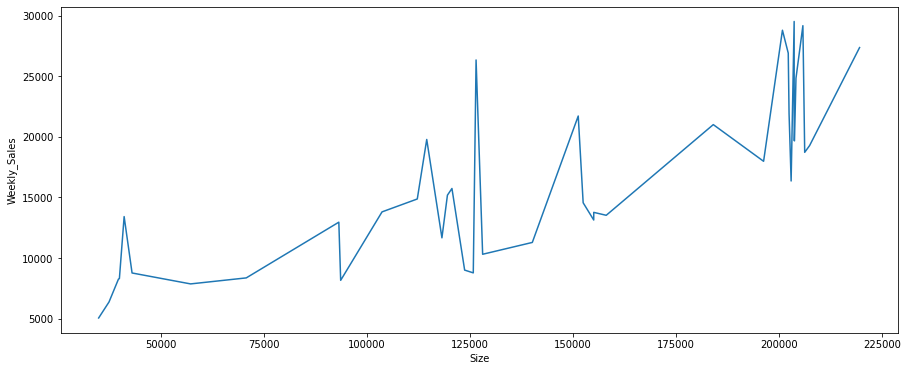

In [19]:
size_analysis = data.groupby(['Size'],as_index=False).mean()
plt.figure(figsize=(15,6))
plt.plot(size_analysis['Size'],size_analysis['Weekly_Sales'])
plt.xlabel('Size')
plt.ylabel('Weekly_Sales')

plt.show()

Since size is not a categorical feature and there is positive correlation between weekly sales and it, we don't need any extra processing on it

# Temperatur Feature

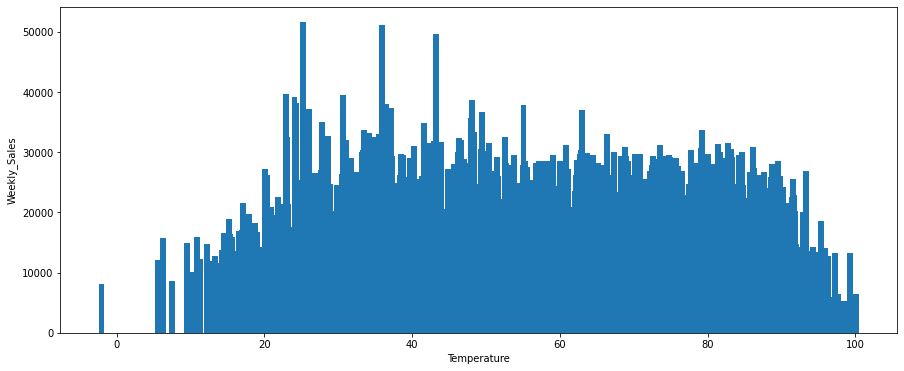

In [20]:
temp_analysis = data.groupby(['Temperature'],as_index=False).mean()
plt.figure(figsize=(15,6))
plt.bar(temp_analysis['Temperature'],temp_analysis['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')

plt.show()

In [21]:
def categorizeTemp(temp):
    if temp < 20:
        return 'Cold'
    elif temp > 80:
        return 'Hot'
    else:
        return 'Warm'
data['Temperature_Cat'] = data.apply(lambda row: categorizeTemp(row['Temperature']), axis=1)
data.drop('Temperature',axis=1, inplace=True)
data.head()

,Weekly_Sales,IsHoliday_x,Type,Size,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Store_Cat,Dept_Cat,Year,Month,Day,Special_Day,Lucky_Months,Temperature_Cat
0,24924.50,False,A,151315,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,2,2010,2,5,0,0,Warm
1,50605.27,False,A,151315,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,4,2010,2,5,0,0,Warm
2,13740.12,False,A,151315,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,2,2010,2,5,0,0,Warm
3,39954.04,False,A,151315,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,3,2010,2,5,0,0,Warm
4,32229.38,False,A,151315,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,3,2010,2,5,0,0,Warm


Temperature is not a categorical feature but there is not positive and negative correlation between weekly sales and it. However we can categorize them in 3 category, because we can see too hot and too cold temperatures has negative correlation with weekly sales. 

# Fuel Price Feature 

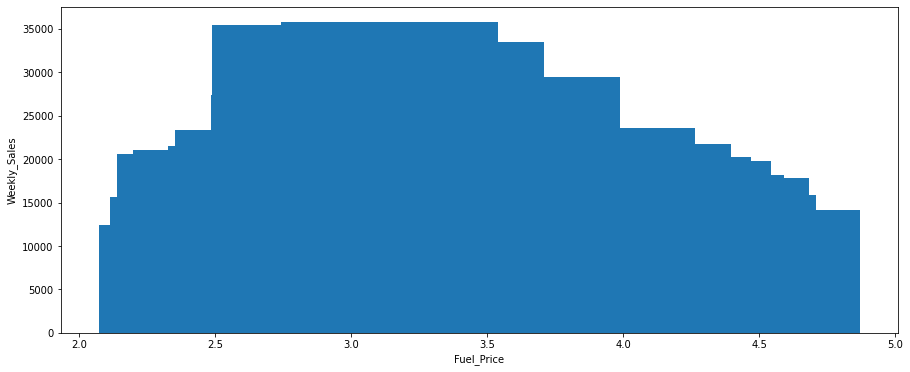

In [22]:
fuel_analysis = data.groupby(['Fuel_Price'],as_index=False).mean()
plt.figure(figsize=(15,6))
plt.bar(fuel_analysis['Fuel_Price'],fuel_analysis['Weekly_Sales'])
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')

plt.show()

In [23]:
def categorizeFuel(fuel):
    if fuel < 2.5 or fuel > 4:
        return 0
    else:
        return 1
data['Good_Price'] = data.apply(lambda row: categorizeFuel(row['Fuel_Price']), axis=1)
data.head()

,Weekly_Sales,IsHoliday_x,Type,Size,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,Store_Cat,Dept_Cat,Year,Month,Day,Special_Day,Lucky_Months,Temperature_Cat,Good_Price
0,24924.50,False,A,151315,2.572,NaN,NaN,NaN,NaN,NaN,...,8.106,4,2,2010,2,5,0,0,Warm,1
1,50605.27,False,A,151315,2.572,NaN,NaN,NaN,NaN,NaN,...,8.106,4,4,2010,2,5,0,0,Warm,1
2,13740.12,False,A,151315,2.572,NaN,NaN,NaN,NaN,NaN,...,8.106,2,2,2010,2,5,0,0,Warm,1
3,39954.04,False,A,151315,2.572,NaN,NaN,NaN,NaN,NaN,...,8.106,4,3,2010,2,5,0,0,Warm,1
4,32229.38,False,A,151315,2.572,NaN,NaN,NaN,NaN,NaN,...,8.106,4,3,2010,2,5,0,0,Warm,1


Fuel Price is not a categorical feature but there is not positive and negative correlation between weekly sales and it. However we can categorize them in 2 category, because we can see too high and too low prices has negative correlation with weekly sales.

# CPI Feature

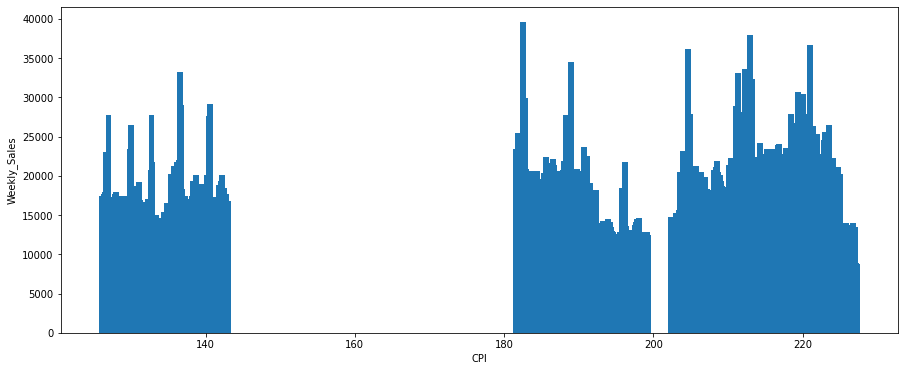

In [24]:
cpi_analysis = data.groupby(['CPI'],as_index=False).mean()
plt.figure(figsize=(15,6))
plt.bar(cpi_analysis['CPI'],cpi_analysis['Weekly_Sales'])
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')

plt.show()

In [25]:
data.drop('CPI',axis=1, inplace=True)

Since there is not any meaningful pattern between CPI and weekly sales we can drop it.

# Unemployment Feature

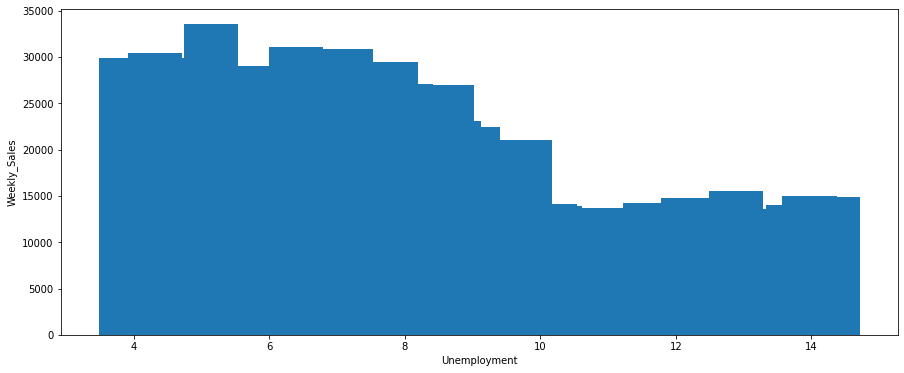

In [26]:
unemp_analysis = data.groupby(['Unemployment'],as_index=False).mean()
plt.figure(figsize=(15,6))
plt.bar(unemp_analysis['Unemployment'],unemp_analysis['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')

plt.show()

Since unemployment is not a categorical feature and there is positive correlation between weekly sales and it, we don't need any extra processing on it

# Markdowns

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Weekly_Sales     421570 non-null  float64
 1   IsHoliday_x      421570 non-null  bool   
 2   Type             421570 non-null  object 
 3   Size             421570 non-null  int64  
 4   Fuel_Price       421570 non-null  float64
 5   MarkDown1        150681 non-null  float64
 6   MarkDown2        111248 non-null  float64
 7   MarkDown3        137091 non-null  float64
 8   MarkDown4        134967 non-null  float64
 9   MarkDown5        151432 non-null  float64
 10  Unemployment     421570 non-null  float64
 11  Store_Cat        421570 non-null  int64  
 12  Dept_Cat         421570 non-null  int64  
 13  Year             421570 non-null  int64  
 14  Month            421570 non-null  int64  
 15  Day              421570 non-null  int64  
 16  Special_Day      421570 non-null  int6

We have lots of null value in Markdowns which means there is not any markdown here so we can change null with 0. By this way we can use markdowns as numerical feature

In [28]:
data.fillna(0, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Weekly_Sales     421570 non-null  float64
 1   IsHoliday_x      421570 non-null  bool   
 2   Type             421570 non-null  object 
 3   Size             421570 non-null  int64  
 4   Fuel_Price       421570 non-null  float64
 5   MarkDown1        421570 non-null  float64
 6   MarkDown2        421570 non-null  float64
 7   MarkDown3        421570 non-null  float64
 8   MarkDown4        421570 non-null  float64
 9   MarkDown5        421570 non-null  float64
 10  Unemployment     421570 non-null  float64
 11  Store_Cat        421570 non-null  int64  
 12  Dept_Cat         421570 non-null  int64  
 13  Year             421570 non-null  int64  
 14  Month            421570 non-null  int64  
 15  Day              421570 non-null  int64  
 16  Special_Day      421570 non-null  int6

In [29]:
def handleCategoricalData(data,str):
    data = pd.concat([data, pd.get_dummies(data[str], prefix=str)], axis=1)
    data.drop(columns=str, axis=1, inplace=True)
    return data

handleCategoricalData applies one-hot encoding on categorical features.

In [30]:
categorical_Cols = ['IsHoliday_x', 'Type', 'Store_Cat', 'Dept_Cat', 'Temperature_Cat']
for c in categorical_Cols:
    data = handleCategoricalData(data,c)

In [31]:
data.head()

,Weekly_Sales,Size,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Year,...,Store_Cat_2,Store_Cat_3,Store_Cat_4,Dept_Cat_1,Dept_Cat_2,Dept_Cat_3,Dept_Cat_4,Temperature_Cat_Cold,Temperature_Cat_Hot,Temperature_Cat_Warm
0,24924.50,151315,2.572,0.0,0.0,0.0,0.0,0.0,8.106,2010,...,0,0,1,0,1,0,0,0,0,1
1,50605.27,151315,2.572,0.0,0.0,0.0,0.0,0.0,8.106,2010,...,0,0,1,0,0,0,1,0,0,1
2,13740.12,151315,2.572,0.0,0.0,0.0,0.0,0.0,8.106,2010,...,1,0,0,0,1,0,0,0,0,1
3,39954.04,151315,2.572,0.0,0.0,0.0,0.0,0.0,8.106,2010,...,0,0,1,0,0,1,0,0,0,1
4,32229.38,151315,2.572,0.0,0.0,0.0,0.0,0.0,8.106,2010,...,0,0,1,0,0,1,0,0,0,1


In [32]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [33]:
def applyModels(X_train, Y_train, X_test, Y_test, models):
    for model in models:
        result = ""
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        mse=mean_squared_error(y_test, y_pred)
        mae=mean_absolute_error(y_test, y_pred)
        r2=r2_score(y_test,y_pred)
        print(model.__str__().split("(")[0] + "\n")
        print("MSE: {}".format(mse))
        print("MAE: {}".format(mae))
        print("R2: {}".format(r2))
        

In [34]:
y = data['Weekly_Sales']
data.drop('Weekly_Sales',inplace=True,axis=1)

In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Size                  421570 non-null  int64  
 1   Fuel_Price            421570 non-null  float64
 2   MarkDown1             421570 non-null  float64
 3   MarkDown2             421570 non-null  float64
 4   MarkDown3             421570 non-null  float64
 5   MarkDown4             421570 non-null  float64
 6   MarkDown5             421570 non-null  float64
 7   Unemployment          421570 non-null  float64
 8   Year                  421570 non-null  int64  
 9   Month                 421570 non-null  int64  
 10  Day                   421570 non-null  int64  
 11  Special_Day           421570 non-null  int64  
 12  Lucky_Months          421570 non-null  int64  
 13  Good_Price            421570 non-null  int64  
 14  IsHoliday_x_False     421570 non-null  uint8  
 15  

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

In [37]:
models = [RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0), 
          AdaBoostRegressor(n_estimators=100, random_state=0),
         GradientBoostingRegressor(random_state=0)]

In [38]:
applyModels(X_train, y_train, X_test, y_test, models)

RandomForestRegressor

MSE: 82467158.80424817
MAE: 3805.033037226831
R2: 0.8425043313678775
AdaBoostRegressor

MSE: 91615088.10461026
MAE: 4210.433053246465
R2: 0.82503362833105
GradientBoostingRegressor

MSE: 76639597.89969903
MAE: 3748.7171972674546
R2: 0.8536337993217207


In [39]:
rf = GradientBoostingRegressor(random_state=0)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

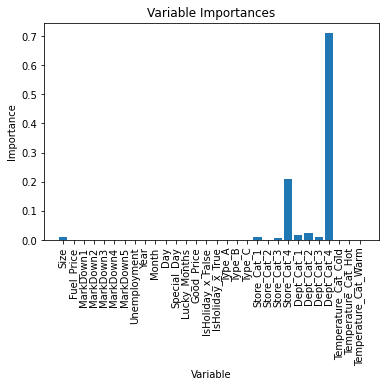

In [40]:
importances = list(rf.feature_importances_)

val = list(range(len(importances)))
plt.bar(val, importances, orientation = 'vertical')
plt.xticks(val, X_test.columns, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


Importance Table shows us each feature's importance on our model.

In [41]:
for i in range(len(importances)):
    print("{} : {}".format(X_test.columns[i],importances[i]))

Size : 0.011477904654857133
Fuel_Price : 4.938771192957087e-05
MarkDown1 : 3.031983774397159e-05
MarkDown2 : 1.4878481369098128e-06
MarkDown3 : 0.0008412557481683448
MarkDown4 : 2.599913590185138e-05
MarkDown5 : 6.6660939119138215e-06
Unemployment : 0.00035300372639752113
Year : 1.9116548429172943e-05
Month : 0.0009868976932518028
Day : 0.0010504096147027438
Special_Day : 0.00029445031922393865
Lucky_Months : 0.0005674548757140367
Good_Price : 0.0
IsHoliday_x_False : 0.0
IsHoliday_x_True : 5.5034513462689584e-05
Type_A : 1.623013245721168e-06
Type_B : 2.8149021841845364e-05
Type_C : 0.0001689498877598268
Store_Cat_1 : 0.009688535239220208
Store_Cat_2 : 0.0003635242737552012
Store_Cat_3 : 0.005559435819400452
Store_Cat_4 : 0.2089840473521722
Dept_Cat_1 : 0.01580729627687253
Dept_Cat_2 : 0.02358545550562182
Dept_Cat_3 : 0.00961668990860513
Dept_Cat_4 : 0.7104369053796735
Temperature_Cat_Cold : 0.0
Temperature_Cat_Hot : 0.0
Temperature_Cat_Warm : 0.0


Since "Temperature_Cat_Hot" and "Temperature_Cat_Warm" importance is 0 with our model we can drop them. 

In [42]:
data.drop("Temperature_Cat_Hot", inplace=True, axis=1)
data.drop("Temperature_Cat_Warm", inplace=True, axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

In [44]:
applyModels(X_train, y_train, X_test, y_test, models)

RandomForestRegressor

MSE: 82496517.30291246
MAE: 3805.339485547966
R2: 0.8424482625467344
AdaBoostRegressor

MSE: 91615088.10461034
MAE: 4210.433053246458
R2: 0.8250336283310499
GradientBoostingRegressor

MSE: 76639597.89969902
MAE: 3748.7171972674546
R2: 0.8536337993217208


After we drop them we have the same result with before since their importances are 0.